# Caclulating "Game Growth Score"

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from numpy import inf
import matplotlib.dates as mdates

pd.options.display.max_rows=500

In [36]:
colnames=['timestamp', 'game_name', 'num_channels', 'num_viewers']

In [37]:
df=pd.read_csv('Natasha.csv',header =None, names = colnames)

In [38]:
df=df.sort_values(by=['game_name','timestamp']).reset_index(drop=True)

In [39]:
df.head()

,timestamp,game_name,num_channels,num_viewers
0,2019-05-21 15:00:00.000,F1 2019,1,1
1,2019-05-21 21:00:00.000,F1 2019,1,1
2,2019-05-21 22:00:00.000,F1 2019,1,2
3,2019-05-25 01:00:00.000,F1 2019,1,235
4,2019-05-25 02:00:00.000,F1 2019,1,247


In [40]:
df['viewer_to_channel_ratio'] = df['num_viewers'] / df['num_channels']

In [41]:
df.shape[0]

2092036

In [43]:
df['game_growth'] = df['viewer_to_channel_ratio'].copy()

In [44]:
df_values=df.values

In [45]:
# look back 168 hours for 1 week time diff
lookback=168
for row_index in range(lookback, df.shape[0]):
    # 0 - time_logged
    # 1 - game_name
    # 2 - num_channels
    # 3 - num_viewers
    # 4 - viewers to channels ratio
    # 5 - viewers to channels ratio (now) / viewers to channels ratio (week ago)
    
# Check if game_name of this row and previous row are the same
    if df_values[row_index,1] == df_values[row_index-lookback,1]:
        last_week_viewer_to_channel_ratio = df_values[row_index-lookback,4]
        if last_week_viewer_to_channel_ratio != 0:
            df_values[row_index,5] = (df_values[row_index,4]/ last_week_viewer_to_channel_ratio )
        else:
            df_values[row_index,5] = 1
    else:
    # If the game names are different, the difference between metrics is invalid, fill with NaN
        df_values[row_index,5] = np.NaN
        


In [46]:
df=pd.DataFrame(df_values).rename(columns={0: 'timestamp',
                                                1: 'game_name',
                                                2: 'num_channels',
                                                3: 'num_viewers',
                                                4: 'viewer_to_channel_ratio',
                                                5: 'game_growth'})

In [55]:
sum(df['game_growth'].isnull())

941598

In [56]:
df.loc[df['game_growth'].notnull()]

,timestamp,game_name,num_channels,num_viewers,viewer_to_channel_ratio,game_growth
0,2019-05-21 15:00:00.000,F1 2019,1,1,1,1
1,2019-05-21 21:00:00.000,F1 2019,1,1,1,1
2,2019-05-21 22:00:00.000,F1 2019,1,2,2,2
3,2019-05-25 01:00:00.000,F1 2019,1,235,235,235
4,2019-05-25 02:00:00.000,F1 2019,1,247,247,247
5,2019-05-26 12:00:00.000,F1 2019,1,38,38,38
6,2019-05-26 13:00:00.000,F1 2019,1,164,164,164
7,2019-05-26 14:00:00.000,F1 2019,1,108,108,108
8,2019-05-26 15:00:00.000,F1 2019,1,22,22,22
9,2019-05-26 16:00:00.000,F1 2019,1,4,4,4


In [59]:
scanning_range = 2091838

In [72]:
LoL_growth_df = df.loc[df['game_name'] == 'League of Legends']

In [91]:
len(LoL_growth_df['timestamp'].values)

937

In [116]:
LoL_growth_df['timestamp']=pd.to_datetime(LoL_growth_df['timestamp'])

/anaconda3/envs/twitchrecommender/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


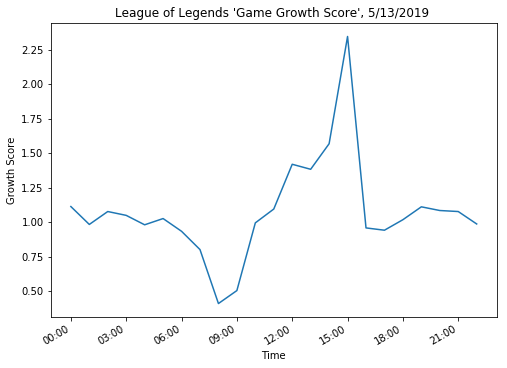

In [136]:
fig, ax = plt.subplots(figsize=(8,6))
# Set background of area behind axis labels
fig.patch.set_facecolor('white')

start_index = 504
plotting_range = 23
ax.plot(LoL_growth_df['timestamp'][start_index:start_index + plotting_range].values,
         LoL_growth_df['game_growth'][start_index:start_index + plotting_range].values)
ax.set_title("League of Legends 'Game Growth Score', 5/13/2019 ")
# loc = matplotlib.dates.AutoDateLocator()
# ax.xaxis.set_major_locator(loc)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
# ax.fmt_xdata = mdates.DateFormatter('%y-%H:%M')
ax.set_ylabel('Growth Score')
ax.set_xlabel('Time')
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
# plt.show()